# Assignment 2
## Backprop
Eric Ding | 15ed21 | 20011628

### 1. Import packages

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from report import Report

### 2. Load data

In [2]:
X, y = fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### 3. Split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=60000,
    test_size=10000,
    shuffle=False
)
print(X_train.shape)

(60000, 784)


In [6]:
classes=10
y_train_encoded = np.eye(classes)[y_train.astype(int)]
y_test_encoded = np.eye(classes)[y_test.astype(int)]

In [7]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
y_test_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 4. Visualize data
This was done using only the training set.

In [11]:
tsne = TSNE(
    n_components=2,
    random_state=123,
    n_jobs=-1
)

In [12]:
size = 1000
X_2d = tsne.fit_transform(X_train[:size])

In [13]:
X_2d

array([[-26.684393  ,   2.3313866 ],
       [-49.30801   ,   0.889437  ],
       [ 23.7904    , -29.644243  ],
       ...,
       [-47.275738  ,  -8.018643  ],
       [-21.319815  ,   0.70740217],
       [-41.13297   ,  22.5249    ]], dtype=float32)

In [14]:
X_2d.shape

(1000, 2)

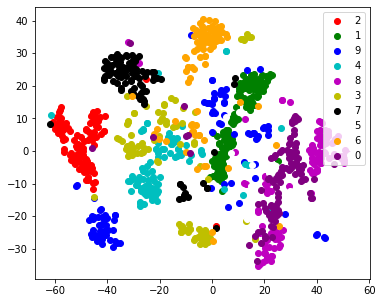

In [15]:
plt.figure(figsize=(6, 5))
y_vis = y_train[:size]
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(
    range(len(set(y_vis))),
    colors,
    set(y_vis)
):
    plt.scatter(
        X_2d[y_vis == str(i), 0],
        X_2d[y_vis == str(i), 1],
        c=c,
        label=label
    )

plt.legend()
plt.show()

The visualization shows that there are clear class separations in higher dimensions. It may be difficult to differentiate between 0 and 9, unless the model can find some higher-order space to do so.

### 5. Train Custom-Built Model

Using default hyperparameters first:

In [16]:
from MLP import MLP

In [17]:
model = MLP(
    seed=123,
    epochs=10,
    learning_rate=1,
    n_layer_nodes=[784, 28, 10],
    momentum=0.5,
    verbose=True
)

In [18]:
model.train(
    X_train,
    y_train_encoded
)

Epoch 0 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 1 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 2 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 3 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 4 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 5 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 6 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 7 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 8 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running
Epoch 9 started.
    Trial 25000 / 600000 running
    Trial 50000 / 600000 running


In [19]:
pred = model.predict(X_test)

In [20]:
pred

array([[5.18379735e-05, 4.30635702e-02, 1.25490754e-03, ...,
        9.99521793e-01, 1.01835808e-04, 2.75000801e-02],
       [5.18379735e-05, 4.30635702e-02, 1.25490754e-03, ...,
        9.99521793e-01, 1.01835808e-04, 2.75000801e-02],
       [5.18379735e-05, 4.30635702e-02, 1.25490754e-03, ...,
        9.99521793e-01, 1.01835808e-04, 2.75000801e-02],
       ...,
       [5.18379735e-05, 4.30635702e-02, 1.25490754e-03, ...,
        9.99521793e-01, 1.01835808e-04, 2.75000801e-02],
       [5.18379735e-05, 4.30635702e-02, 1.25490754e-03, ...,
        9.99521793e-01, 1.01835808e-04, 2.75000801e-02],
       [5.18379735e-05, 4.30635702e-02, 1.25490754e-03, ...,
        9.99521793e-01, 1.01835808e-04, 2.75000801e-02]])

In [21]:
pred_classes = np.argmax(pred, axis=1)
pred_classes

array([7, 7, 7, ..., 7, 7, 7])

In [22]:
report = Report(pred_classes, y_test.astype(int))

In [23]:
print('Accuracy:', report.accuracy())
print('Recall:', report.recall())
print('Precision:', report.precision())
print('F1:', report.f1())

Accuracy: 0.1028
Recall: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.5, 8: 0.0, 9: 0.0}
Precision: {0: -0.0, 1: -0.0, 2: -0.0, 3: -0.0, 4: -0.0, 5: -0.0, 6: -0.0, 7: 0.09321726514327167, 8: -0.0, 9: -0.0}
F1: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.07856924487924181, 8: 0.0, 9: 0.0}


In [24]:
pd.DataFrame(report.confusion(), index=list(set(y_test)).sort(), columns=list(set(y_test)).sort())

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,8972,8972,8972,8972,8972,8972,8972,1028,8972,8972
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0
